<h1>About Dataset</h1><br>
Background
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.<br>
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
<ul>
    <li> Normal </li>
    <li> Anomalous </li>
</ul>

In [6]:
import pandas as pd 
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

#Settings
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

<h1> Load Data </h1>

In [9]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [11]:
train.shape

(25192, 42)

In [12]:
test.shape

(22544, 41)

<h1> Exploratory Data Analysis </h1>

In [13]:
#Descriptive Statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [16]:
#Deleting the 'num_outbound_cmds' because it is redundant
train.drop(['num_outbound_cmds'], axis = 1, inplace = True)
test.drop(['num_outbound_cmds'], axis = 1, inplace = True)

In [17]:
# Let see the class distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

<h1> Scaling Numerical Attributes </h1>

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#extract numerical attributes and scale it to have zero mean and unit variance

cols = train.select_dtypes(include = ['float64', 'int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include = ['float64', 'int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include = ['float64', 'int64']))

#turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)


<h1>Encoding Categorical attributes</h1>

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#extract categorical attributes from both training and test sets
cattrain = train.select_dtypes(include = ['object']).copy()
cattest = test.select_dtypes(include = ['object']).copy()

#encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

#Separate target column from encoded data
enctrain = traincat.drop(['class'], axis = 1)
cat_Ytrain = traincat[['class']].copy()

In [22]:
train_x = pd.concat([sc_traindf, enctrain], axis = 1)
train_y = train['class']
train_x.shape

(25192, 40)

In [25]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.334947,-0.299430,1.595477,1.600209,-0.372186,-0.373098,-1.388806,0.042773,-0.373886,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.694082,-0.313230,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.476067,0.059355,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.023115,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


In [26]:
test_df = pd.concat([sc_testdf, testcat], axis = 1)

In [27]:
test_df.shape

(22544, 40)

<h1> Feature Selection </h1>

<Axes: xlabel='feature'>

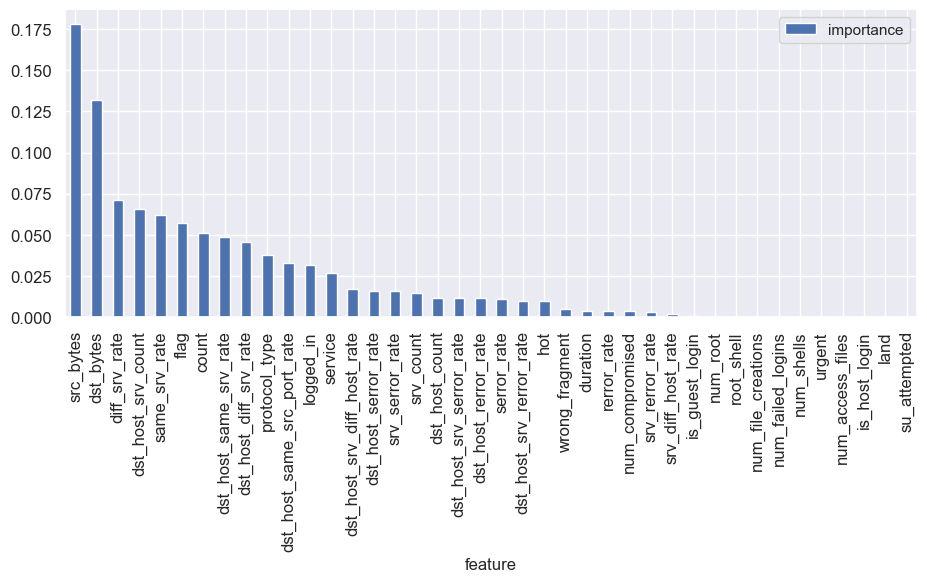

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(train_x, train_y)
#extract important features
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': train_x.columns, 'importance': score})
importances = importances.sort_values('importance', ascending = False).set_index('feature')

#Plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [30]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

#create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe.fit(train_x, train_y)

#summarize the selection of the attributes
feature_map = [(i,v) for i,v  in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i== True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

<h1> Dataset Partition </h1>

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, train_size = 0.70, random_state = 2)

<h1> Modeling </h1>

<p> I already know from a notebook that KNN gives the best performance, so i will directly use it. </p>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier(n_jobs = -1)
KNN_Classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

<h1> Evaluating the model </h1>

In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

score = cross_val_score(KNN_Classifier, X_train, Y_train, cv = 10)
accuracy = metrics.accuracy_score(Y_train, KNN_Classifier.predict(X_train))
confusion_matrix = metrics.confusion_matrix(Y_train, KNN_Classifier.predict(X_train))
classification = metrics.classification_report(Y_train, KNN_Classifier.predict(X_train))

print()
print('==============================  Model Evaluation ==============================')
print()
print("Cross Validation Mean Score:" "\n", score.mean())
print()
print("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


==============================  Model Evaluation ==============================

Cross Validation Mean Score:
 0.9914370153431007

Model Accuracy:
 0.9937620505840989

Confusion matrix:
 [[8168   77]
 [  33 9356]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      8245
      normal       0.99      1.00      0.99      9389

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99      0.99      0.99     17634




<h1> Prediction for Test Data </h1>

In [45]:
result = KNN_Classifier.predict(test_df)

In [46]:
result

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
       'anomaly'], dtype=object)